In [41]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [42]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)
classes = ('plain', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [43]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [44]:
dataiter = iter(trainloader)

In [45]:
images, labels = dataiter.next()

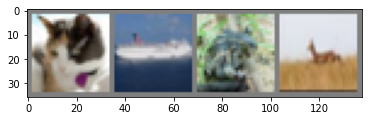

cat   ship  frog  deer 


In [46]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [47]:
import torch.nn as nn
import torch.nn.functional as F

In [59]:
# Define a convolutional neural network

class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [60]:
# Let's use a classification cross-entropy loss ans SGD with momentum.

import torch.optim as optim

criterion=  nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [61]:
# Train the net

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100  == 99:
            print(f'[{epoch+1}, {i+1:5d}] loss: {running_loss / 100: .3f}')
            running_loss = 0.0

print('Finished Training')


[1,   100] loss:  2.305
[1,   200] loss:  2.302
[1,   300] loss:  2.306
[1,   400] loss:  2.300
[1,   500] loss:  2.294
[1,   600] loss:  2.286
[1,   700] loss:  2.291
[1,   800] loss:  2.278
[1,   900] loss:  2.259
[1,  1000] loss:  2.218
[1,  1100] loss:  2.212
[1,  1200] loss:  2.206
[1,  1300] loss:  2.142
[1,  1400] loss:  2.120
[1,  1500] loss:  2.106
[1,  1600] loss:  2.072
[1,  1700] loss:  2.074
[1,  1800] loss:  2.033
[1,  1900] loss:  2.037
[1,  2000] loss:  2.030
[1,  2100] loss:  2.008
[1,  2200] loss:  1.959
[1,  2300] loss:  1.968
[1,  2400] loss:  2.001
[1,  2500] loss:  1.926
[1,  2600] loss:  1.900
[1,  2700] loss:  1.898
[1,  2800] loss:  1.893
[1,  2900] loss:  1.916
[1,  3000] loss:  1.891
[1,  3100] loss:  1.823
[1,  3200] loss:  1.849
[1,  3300] loss:  1.876
[1,  3400] loss:  1.859
[1,  3500] loss:  1.807
[1,  3600] loss:  1.780
[1,  3700] loss:  1.775
[1,  3800] loss:  1.808
[1,  3900] loss:  1.702
[1,  4000] loss:  1.751
[1,  4100] loss:  1.680
[1,  4200] loss:

In [62]:
# Quick save

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

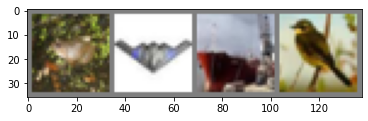

GrountTruth:  frog  plain ship  bird 


In [63]:
# Test

dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GrountTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [64]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [66]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  frog  plain ship  horse


In [67]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10,000 test images : ', 100*correct / total, '%')

Accuracy of the network on the 10,000 test images :  55.67 %
